In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller



In [2]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [3]:
from scipy.stats import levene


In [4]:
start = dt.datetime(2000, 1, 1)
end= dt.datetime.now() - dt.timedelta(days=3)
etf = ['SPY']
#Datos diarios
data = yf.download(etf, start, end)['Adj Close']
#Datos mensuales precio ultimo dia del mes para probar
data_m = data.resample('M').apply(lambda x: x.iloc[-1,])
#Datos mensuales precio ultimo dia de la semana para probar
data_s = data.resample('W').apply(lambda x: x.iloc[-1])



[*********************100%***********************]  1 of 1 completed


In [5]:
#Aplico primera diferencia a serie de tiempo con datos diarios
#Esto trata de volver la serie estacionaria

data1 = data.values[1:] - data.values[:-1]
data1 = np.concatenate([data1,[0]])
data1 = pd.Series(data1, index=data.index)

#Aplico primera diferencia a serie de tiempo con datos mensuales
data_m1 = data_m.values[1:] - data_m.values[:-1]
data_m1 = np.concatenate([data_m1,[0]])
data_m1 = pd.Series(data_m1, index=data_m.index)

#Aplico primera diferencia a serie de tiempo con datos semanales
data_s1 = data_s.values[1:] - data_s.values[:-1]
data_s1 = np.concatenate([data_s1,[0]])
data_s1 = pd.Series(data_s1, index=data_s.index)

In [6]:
##Aplico variacion porcentual a serie de tiempo con datos diarios
#Esto es similar a 1° diff en sentido que trata de volver la serie estacionaria
returns = np.diff(data) / data[:-1]
returns = np.concatenate([returns,[0]])
returns = pd.Series(returns, index=data.index)

##Aplico variacion porcentual a serie de tiempo con datos diarios
returns_m = np.diff(data_m) / data_m[:-1]
returns_m = np.concatenate([returns_m,[0]])
returns_m = pd.Series(returns_m, index=data_m.index)

##Aplico variacion porcentual a serie de tiempo con datos diarios
returns_s = np.diff(data_s) / data_s[:-1]
returns_s = np.concatenate([returns_s,[0]])
returns_s = pd.Series(returns_s, index=data_s.index)


In [7]:
data_set = returns

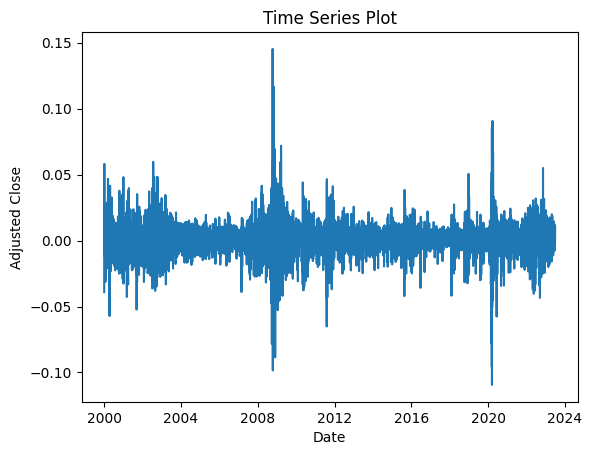

In [8]:
# Exclude the first observation from data to align with returns
#aligned_data = data[1:]
# Create the plot
plt.plot(data_set.index, data_set)

# Set plot title and labels
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')

# Show the plot
plt.show()

In [9]:
# Perform Augmented Dickey-Fuller test
result = adfuller(data_set)

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Compare the p-value to the significance level (e.g., 0.05) for interpretation
if p_value < 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

ADF Statistic: -18.8070
p-value: 0.0000
The time series is likely stationary.


In [10]:
#CHECK IF MEAN IS CONSTANT OVER TIME
# Calculate mean for different segments of dataset
segment_size = 56  # Adjust the segment size as needed
num_segments = len(data_set) // segment_size

means = []
for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment_mean = np.mean(data_set[start_idx:end_idx])
    means.append(segment_mean)

# Check if means are relatively constant
mean_variation = np.std(means)  # Calculate the standard deviation of the means
threshold = 0.1  # Adjust the threshold as needed

if mean_variation < threshold:
    print("The mean of dataset is relatively constant over time.")
else:
    print("The mean of dataset varies significantly over time.")


The mean of dataset is relatively constant over time.


In [11]:
#CHECK IF VARIANCE IS CONSTANT OVER TiME
# Define the segment sizes
segment_size = 56  # Adjust as needed

# Calculate the number of segments
num_segments = len(data_set) // segment_size

# Create empty list to store variances
variances = []

# Calculate variance for each segment
for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size
    segment_data = data_set[start_idx:end_idx]
    segment_variance = np.var(segment_data)
    variances.append(segment_data)

# Perform Levene's test for homogeneity of variances
statistic, p_value = levene(*variances)

# Print the test results
print(f"Levene's test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Compare the p-value to a significance level (e.g., 0.05) for interpretation
if p_value < 0.05:
    print("The variances of the segments are significantly different.")
else:
    print("The variances of the segments are not significantly different.")


Levene's test statistic: 20.9240
p-value: 0.0000
The variances of the segments are significantly different.


C:\Users\Renzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


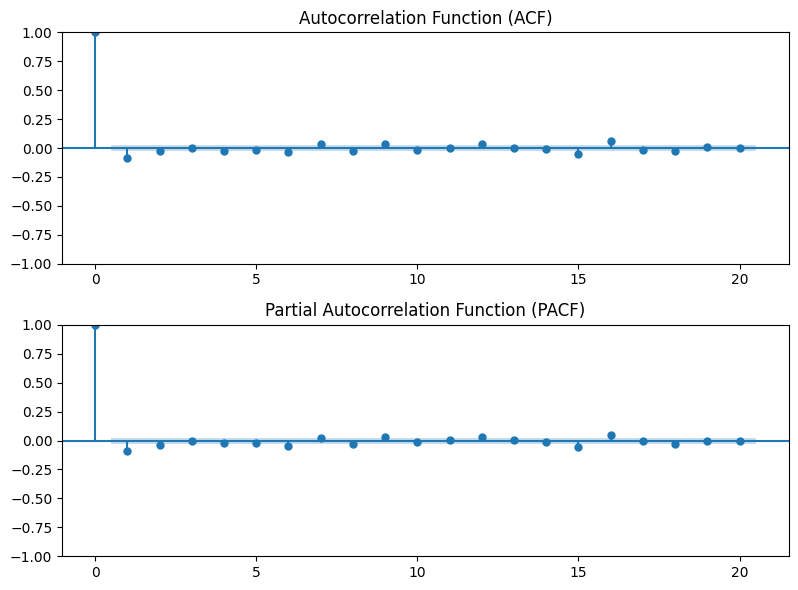

In [12]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
# Plot ACF
acf_plot = plot_acf(data_set, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
pacf_plot = plot_pacf(data_set, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
